In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

from data import Burgers_Dataset
from unet2d import Unet2D
from diffuser import GaussianDiffusion

In [2]:
ds = Burgers_Dataset("../data/burgers_data_Nt100_v1e-02_N200.mat", normalize=False)

Loaded 200 samples from ../data/burgers_data_Nt100_v1e-02_N200.mat
Shape of x: torch.Size([200, 1, 100, 128])


In [3]:
torch.manual_seed(234)
torch.cuda.manual_seed(234)

In [4]:
model = Unet2D(
    channels=1,
    cond_channels=1,
    channel_mults=(1, 2, 4, 8),
    init_conv_channels=32,
    init_conv_kernel_size=5
)
diffusion_model = GaussianDiffusion(
    model=model,
    sample_size=(1, 100, 128),
    timesteps=800,
    objective='pred_x0',
    physics_loss_weight=0.0
)
diffusion_model = diffusion_model.to("cuda:0")

In [5]:
x = ds[-4:]['x']
y = ds[-4:]['y']

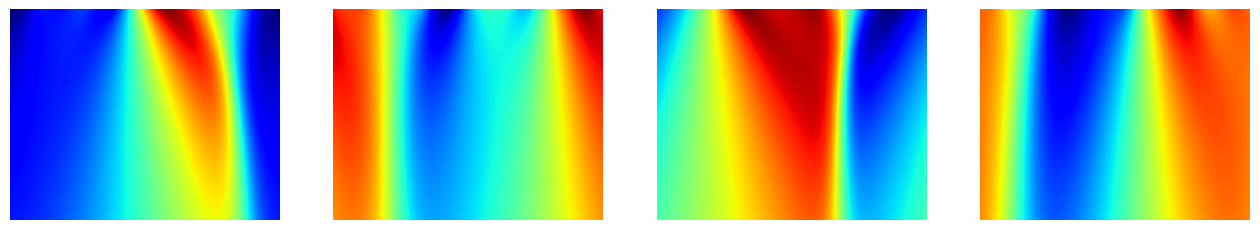

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    ax[i].imshow(x[i, 0, :, :], cmap='jet')
    # ax[i].set_title("x")
    ax[i].axis("off")

In [8]:
def make_prediction(diffuser, cond, physics_loss_weight, use_res_diff):
    if use_res_diff:
        diffuser.model.load_state_dict(torch.load(f"./ckpts/burgers_{physics_loss_weight:.2f}phyloss_resdiff/ckpt.pt")['model_state_dict'])
    else:
        diffuser.model.load_state_dict(torch.load(f"./ckpts/burgers_{physics_loss_weight:.2f}phyloss/ckpt.pt")['model_state_dict'])
    x_pred = diffuser.sample(cond)

    return x_pred.cpu().numpy().squeeze()

In [9]:
x_pred1 = make_prediction(diffusion_model, y, 0.0, False)

DDPM sampling: 100%|██████████| 800/800 [01:00<00:00, 13.28it/s]


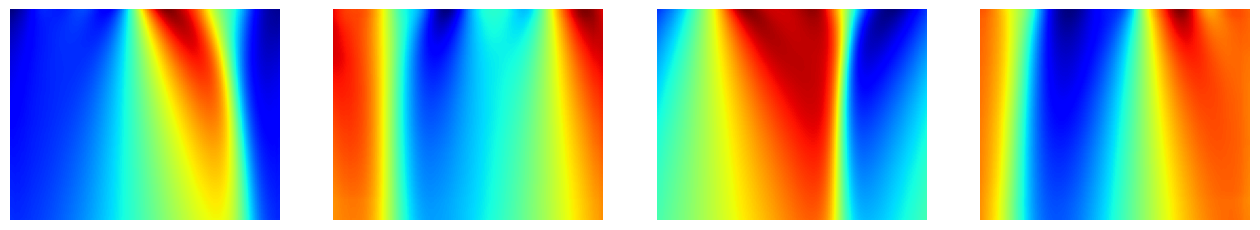

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    ax[i].imshow(x_pred1[i, :, :], cmap='jet')
    # ax[i].set_title("x")
    ax[i].axis("off")

In [53]:
x_pred2 = make_prediction(diffusion_model, y, 0.05, False)

DDPM sampling: 100%|██████████| 800/800 [00:31<00:00, 25.01it/s]


In [54]:
x_pred3 = make_prediction(diffusion_model, y, 0.1, False)

DDPM sampling: 100%|██████████| 800/800 [00:31<00:00, 25.08it/s]


In [55]:
x_pred4 = make_prediction(diffusion_model, y, 0.2, False)

DDPM sampling: 100%|██████████| 800/800 [00:31<00:00, 25.04it/s]


In [56]:
x = x.squeeze().numpy()

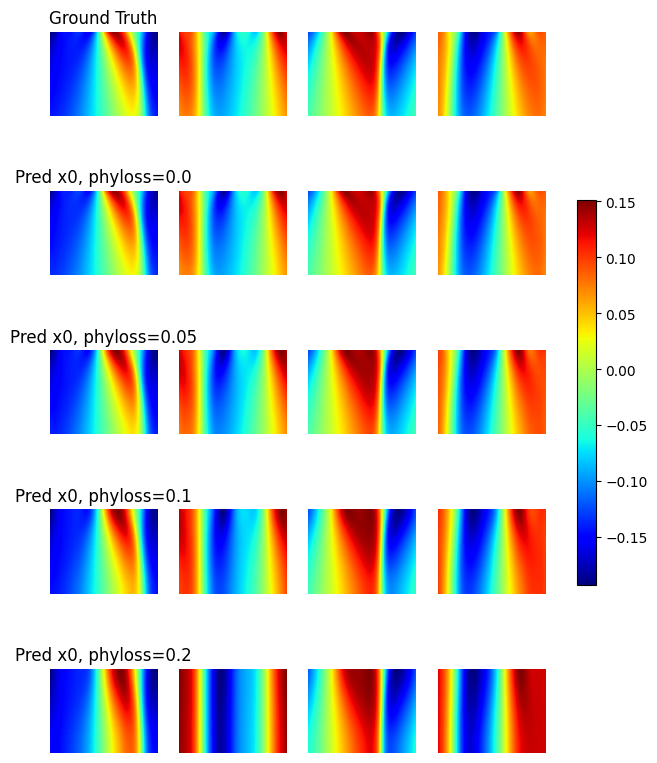

In [57]:
fig, ax = plt.subplots(5, 4, figsize=(8, 10))
for i in range(4):
    im = ax[0, i].imshow(x[i], cmap='jet')
    im = ax[1, i].imshow(x_pred1[i], cmap='jet')
    im = ax[2, i].imshow(x_pred2[i], cmap='jet')
    im = ax[3, i].imshow(x_pred3[i], cmap='jet')
    im = ax[4, i].imshow(x_pred4[i], cmap='jet')
    ax[0, i].set_axis_off()
    ax[1, i].set_axis_off()
    ax[2, i].set_axis_off()
    ax[3, i].set_axis_off()
    ax[4, i].set_axis_off()
    ax[0, 0].set_title('Ground Truth')
    ax[1, 0].set_title('Pred x0, phyloss=0.0')
    ax[2, 0].set_title('Pred x0, phyloss=0.05')
    ax[3, 0].set_title('Pred x0, phyloss=0.1')
    ax[4, 0].set_title('Pred x0, phyloss=0.2')
fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.5)

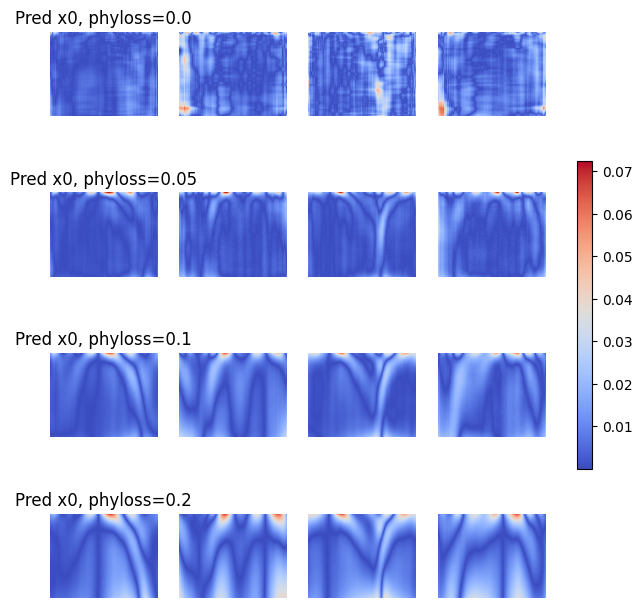

In [59]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    im = ax[0, i].imshow(np.abs(x[i]-x_pred1[i]), cmap='coolwarm')
    im = ax[1, i].imshow(np.abs(x[i]-x_pred2[i]), cmap='coolwarm')
    im = ax[2, i].imshow(np.abs(x[i]-x_pred3[i]), cmap='coolwarm')
    im = ax[3, i].imshow(np.abs(x[i]-x_pred4[i]), cmap='coolwarm')
    ax[0, i].set_axis_off()
    ax[1, i].set_axis_off()
    ax[2, i].set_axis_off()
    ax[3, i].set_axis_off()
    ax[0, 0].set_title('Pred x0, phyloss=0.0')
    ax[1, 0].set_title('Pred x0, phyloss=0.05')
    ax[2, 0].set_title('Pred x0, phyloss=0.1')
    ax[3, 0].set_title('Pred x0, phyloss=0.2')
fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.5)

In [46]:
x_pred21 = make_prediction(diffusion_model, y, 0.05, True)

DDPM sampling: 100%|██████████| 800/800 [00:32<00:00, 25.00it/s]


In [47]:
x_pred31 = make_prediction(diffusion_model, y, 0.1, True)

DDPM sampling: 100%|██████████| 800/800 [00:31<00:00, 25.07it/s]


In [48]:
x_pred41 = make_prediction(diffusion_model, y, 0.2, True)

DDPM sampling: 100%|██████████| 800/800 [00:31<00:00, 25.10it/s]


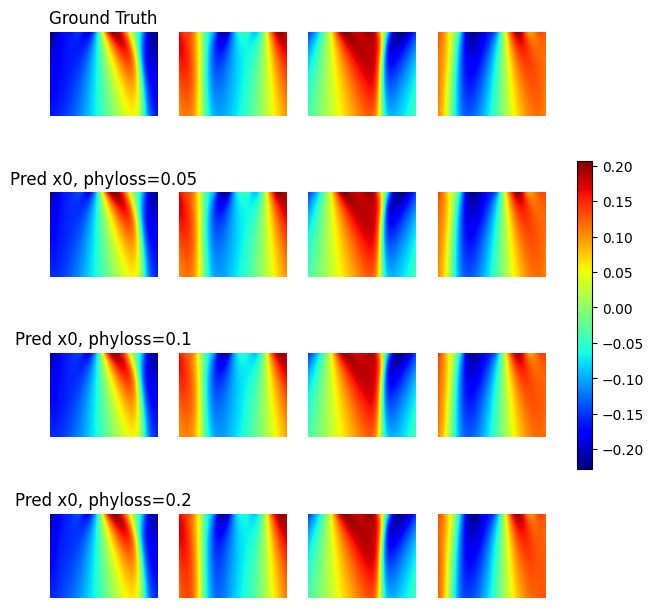

In [51]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    im = ax[0, i].imshow(x[i], cmap='jet')
    im = ax[1, i].imshow(x_pred21[i], cmap='jet')
    im = ax[2, i].imshow(x_pred31[i], cmap='jet')
    im = ax[3, i].imshow(x_pred41[i], cmap='jet')
    ax[0, i].set_axis_off()
    ax[1, i].set_axis_off()
    ax[2, i].set_axis_off()
    ax[3, i].set_axis_off()
    ax[0, 0].set_title('Ground Truth')
    ax[1, 0].set_title('Pred x0, phyloss=0.05')
    ax[2, 0].set_title('Pred x0, phyloss=0.1')
    ax[3, 0].set_title('Pred x0, phyloss=0.2')
fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.5)

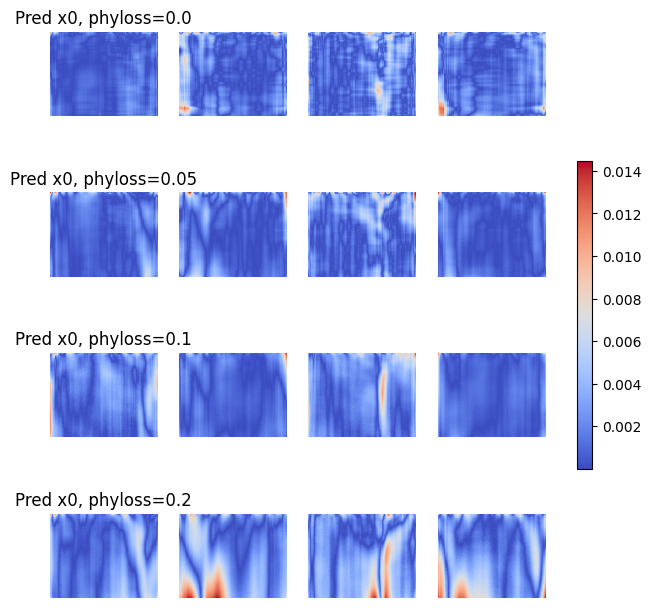

In [60]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    im = ax[0, i].imshow(np.abs(x[i]-x_pred1[i]), cmap='coolwarm')
    im = ax[1, i].imshow(np.abs(x[i]-x_pred21[i]), cmap='coolwarm')
    im = ax[2, i].imshow(np.abs(x[i]-x_pred31[i]), cmap='coolwarm')
    im = ax[3, i].imshow(np.abs(x[i]-x_pred41[i]), cmap='coolwarm')
    ax[0, i].set_axis_off()
    ax[1, i].set_axis_off()
    ax[2, i].set_axis_off()
    ax[3, i].set_axis_off()
    ax[0, 0].set_title('Pred x0, phyloss=0.0')
    ax[1, 0].set_title('Pred x0, phyloss=0.05')
    ax[2, 0].set_title('Pred x0, phyloss=0.1')
    ax[3, 0].set_title('Pred x0, phyloss=0.2')
fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.5)